# Exercício Exemplo Aula 3

## Análise de projetos

Neste exercício iremos aplicar os conceitos apresentados sobre análise descritiva para analisar as entregas realizadas por um time de um projeto.

## Carregar módulos

In [1]:
import numpy as np
import pandas as pd

## Carregar dados

In [2]:
dados = pd.read_csv('projetos_entrega.csv')

In [3]:
dados.head()

,semana,entregas
0,25,2.0
1,26,9.0
2,27,10.0
3,28,1.0
4,29,6.0


## Análises

### 1 - Mostrar a evolução das entregas conforme as semanas (dica: eixo x - semanas, eixo y - entregas)

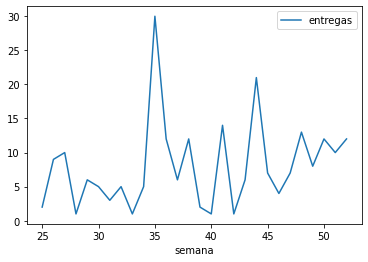

In [5]:
dados.plot(x = 'semana', y = 'entregas')

### 2 - Aplicar as medidas de posição no número de entregas(média, mediana, quartil 1, quartil 3, mínimo e máximo)

In [18]:
dados_resumo = dados.agg(min_entregas = pd.NamedAgg('entregas', 'min'),
                         max_entregas = pd.NamedAgg('entregas', 'max'),
                         media_entregas = pd.NamedAgg('entregas', 'mean')) \
                    .reset_index()

In [19]:
percentis = dados['entregas'].quantile([0.25, 0.5, 0.75]) \
                             .to_frame() \
                             .reset_index()

In [20]:
dados_resumo = dados_resumo.append(percentis) \
                           .rename(columns={'index': 'metricas'}) \
                           .reset_index(drop=True)

In [21]:
dados_resumo

,metricas,entregas
0,min_entregas,1.000000
1,max_entregas,30.000000
2,media_entregas,8.035714
3,0.25,3.750000
4,0.5,6.500000
5,0.75,12.000000


### 3 - Aplicar as medidas de variabilidade no número de entregas (variância e desvio padrão)

In [22]:
dados.agg(variancia_idh = pd.NamedAgg('entregas', 'var'),
          dp_idh = pd.NamedAgg('entregas', 'std')) \
     .reset_index()

,index,entregas
0,variancia_idh,42.109788
1,dp_idh,6.489206


## Perguntas

- Qual semana apresentou maior pico de entregas? Quantas entregas foram realizadas?
- Qual semana apresentou menor pico de entregas? Quantas entregas foram realizadas?
- A média e mediana são iguais ou diferentes? Qual destes valores você teria maior confiança?
- Qual a diferença do número de entregas entre o primeiro e o terceiro quartil? Você acredita ser um valor baixo ou alto?
- Você acredita que existe uma variabilidade muita alta nas quantidades de entregas? Qual o valor apresentado pelo desvio-padrão?
- Se você estivesse no papel de gestão, o que você faria para diminuir esta variabilidade na quantidade de entregas?